In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, XGBRegressor

In [2]:
data = pd.read_csv('database_IND.csv')

### EDA

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [32]:
data.size()

TypeError: 'numpy.int32' object is not callable

In [5]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [7]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [42]:
data["generation_data_source"].head()

0                              NaN
1                              NaN
2                              NaN
3    Central Electricity Authority
4    Central Electricity Authority
Name: generation_data_source, dtype: object

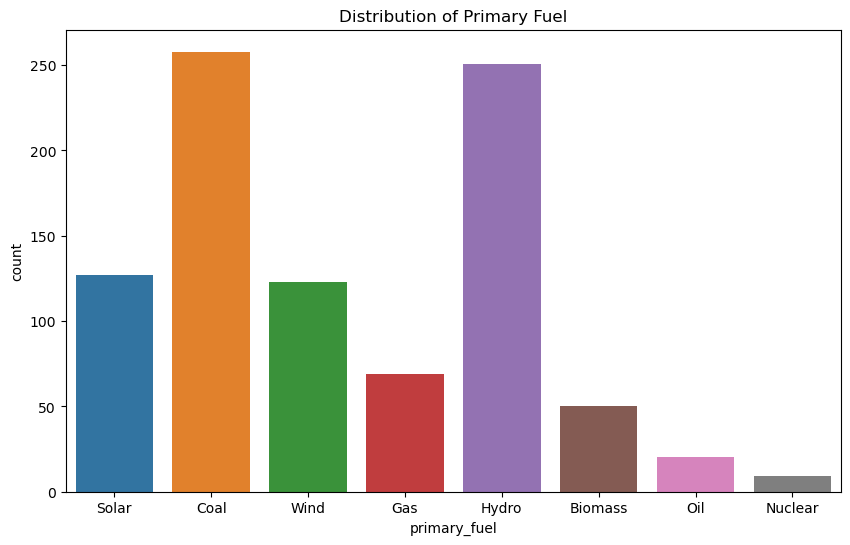

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_fuel', data=data)
plt.title('Distribution of Primary Fuel')
plt.show()

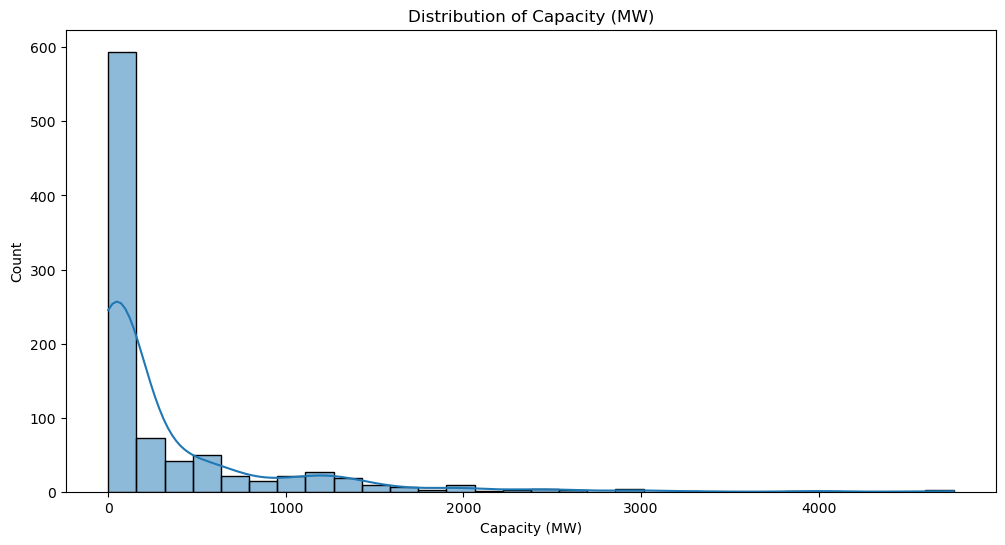

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data['capacity_mw'], bins=30, kde=True)
plt.title('Distribution of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.show()

### Feature Engineering

In [43]:
mean_latitude = data['latitude'].mean()
mean_longitude = data['longitude'].mean()

data['latitude'].fillna(mean_latitude, inplace=True)
data['longitude'].fillna(mean_longitude, inplace=True)

data['other_fuel1'].fillna(data['other_fuel1'].mode()[0], inplace=True)
data['other_fuel2'].fillna(data['other_fuel2'].mode()[0], inplace=True)
data['other_fuel3'].fillna(data['other_fuel2'].mode()[0], inplace=True)
data['commissioning_year'].fillna(data["commissioning_year"].mode()[0], inplace=True)
data['owner'].fillna(data['owner'].mode()[0], inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0], inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0], inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mode()[0], inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mode()[0], inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mode()[0], inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mode()[0], inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mode()[0], inplace=True)
data['generation_data_source'].fillna(data['generation_data_source'].mode()[0], inplace=True)

In [44]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                   0
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

### Feature Selection

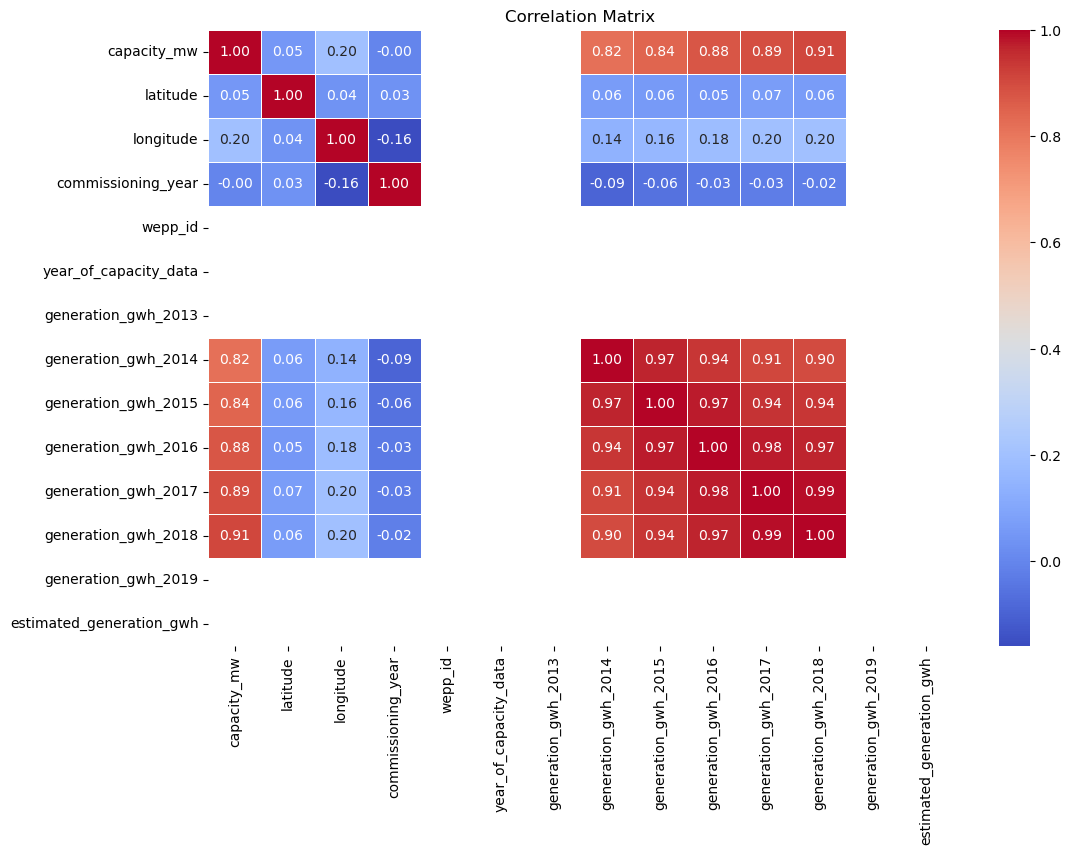

In [45]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [48]:
correlation_matrix = data.corr().abs()

correlation_threshold = 0.8

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

data_dropped = data.drop(columns=highly_correlated_features)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6168\2341883535.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [49]:
data_dropped

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Oil,...,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Oil,...,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,Oil,...,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Oil,...,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Oil,...,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Oil,...,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Oil,...,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,Oil,...,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Oil,...,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,2019.0,NaN,NaN,Central Electricity Authority,NaN


In [51]:
data_dropped.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                   0
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [63]:
 data_dropped.drop(["url","name","country_long"], inplace = True, axis = 1) 

In [ ]:
data_dropped.drop(["wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"], inplace = True, axis = 1)
data_dropped.drop(["url","name","country_long"], inplace = True, axis = 1)  

In [64]:
data_dropped

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source
0,IND,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Oil,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,Central Electricity Authority
1,IND,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Oil,Oil,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,Central Electricity Authority
2,IND,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,Oil,Oil,2015.0,AES,CDM,WRI,2019.0,Central Electricity Authority
3,IND,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Oil,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,Central Electricity Authority
4,IND,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Oil,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Oil,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,Central Electricity Authority
903,IND,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Oil,Oil,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,Central Electricity Authority
904,IND,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,Oil,Oil,2015.0,Acc Acc ltd,CDM,WRI,2019.0,Central Electricity Authority
905,IND,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Oil,Oil,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,Central Electricity Authority


In [65]:
data_dropped.isnull().sum()

country                   0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [66]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                907 non-null    float64
 4   longitude               907 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   other_fuel1             907 non-null    object 
 7   other_fuel2             907 non-null    object 
 8   other_fuel3             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  geolocation_source      907 non-null    object 
 13  year_of_capacity_data   907 non-null    float64
 14  generation_data_source  907 non-null    ob

In [67]:
categorical_features = data_dropped.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for feature in categorical_features:
    data_dropped[feature] = label_encoder.fit_transform(data_dropped[feature])


In [69]:
data_dropped.head()

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,2,0,0,2011.0,229,109,1,2019.0,0
1,0,519,98.0,24.7663,74.6090,1,2,0,0,2015.0,258,174,2,2019.0,0
2,0,853,39.2,21.9038,69.3732,7,2,0,0,2015.0,2,21,2,2019.0,0
3,0,0,135.0,23.8712,91.3602,2,2,0,0,2004.0,5,22,2,2019.0,0
4,0,1,1800.0,21.9603,82.4091,1,2,0,0,2015.0,5,22,2,2019.0,0


### Splitting The Data

In [70]:
X = data_dropped.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_fuel = data_dropped['primary_fuel']
y_capacity = data_dropped['capacity_mw']

In [71]:
X_train, X_test, y_fuel_train, y_fuel_test, y_capacity_train, y_capacity_test = train_test_split(X, y_fuel, y_capacity, test_size=0.2, random_state=42)

In [74]:
fuel_model = XGBClassifier(random_state=42)
fuel_model.fit(X_train, y_fuel_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [75]:
fuel_predictions = fuel_model.predict(X_test)
accuracy_fuel = accuracy_score(y_fuel_test, fuel_predictions)
print(f"Accuracy for predicting primary fuel: {accuracy_fuel}")

Accuracy for predicting primary fuel: 0.7582417582417582


In [76]:
capacity_model = XGBRegressor(random_state=42)
capacity_model.fit(X_train, y_capacity_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [77]:
capacity_predictions = capacity_model.predict(X_test)
mae_capacity = mean_absolute_error(y_capacity_test, capacity_predictions)
print(f"Mean Absolute Error for predicting capacity: {mae_capacity}")

Mean Absolute Error for predicting capacity: 280.0797998800134
